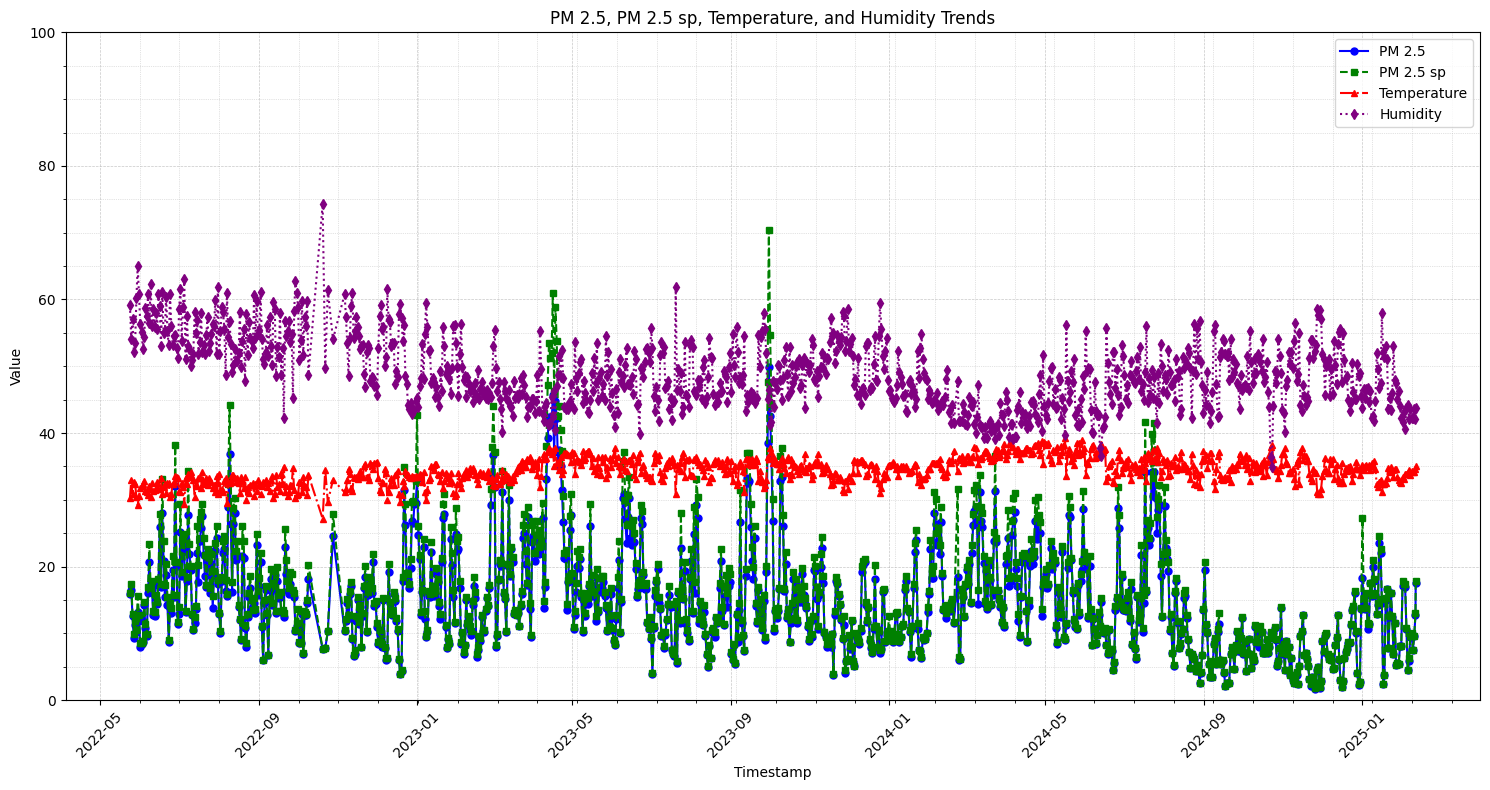

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏ü‡∏•‡πå CSV
df = pd.read_csv("VL_pm_data.csv")

# ‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå timestamp ‡πÄ‡∏õ‡πá‡∏ô datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏™‡πâ‡∏ô (Line Plot) ‡∏Ç‡∏≠‡∏á pm_2_5, pm_2_5_sp, temperature ‡πÅ‡∏•‡∏∞ humidity
plt.figure(figsize=(15, 8))  # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ç‡∏ô‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü

# Plot PM 2.5
plt.plot(df['timestamp'], df['pm_2_5'], marker='o', markersize=5, linestyle='-', color='blue', label='PM 2.5')
plt.plot(df['timestamp'], df['pm_2_5_sp'], marker='s', markersize=5, linestyle='--', color='green', label='PM 2.5 sp')

# Plot Temperature
plt.plot(df['timestamp'], df['temperature'], marker='^', markersize=5, linestyle='-.', color='red', label='Temperature')

# Plot Humidity
plt.plot(df['timestamp'], df['humidity'], marker='d', markersize=5, linestyle=':', color='purple', label='Humidity')

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏ä‡∏∑‡πà‡∏≠‡πÅ‡∏Å‡∏ô‡πÅ‡∏•‡∏∞‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("PM 2.5, PM 2.5 sp, Temperature, and Humidity Trends")

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏Ç‡∏≠‡∏ö‡πÄ‡∏Ç‡∏ï‡∏Ç‡∏≠‡∏á‡πÅ‡∏Å‡∏ô y ‡πÉ‡∏´‡πâ‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡πà‡∏≤‡∏ï‡∏±‡πâ‡∏á‡πÅ‡∏ï‡πà 0 ‡∏ñ‡∏∂‡∏á 100
plt.ylim(0, 100)

# ‡πÅ‡∏™‡∏î‡∏á‡πÄ‡∏™‡πâ‡∏ô‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏Ñ‡∏≥‡∏≠‡∏ò‡∏¥‡∏ö‡∏≤‡∏¢‡πÄ‡∏™‡πâ‡∏ô‡∏Å‡∏£‡∏≤‡∏ü
plt.grid(True, linestyle='--', alpha=0.7)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏™‡πâ‡∏ô‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡πÉ‡∏ô‡πÅ‡∏Å‡∏ô x ‡πÅ‡∏•‡∏∞ y
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

plt.legend()

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.xticks(rotation=45)  # ‡∏´‡∏°‡∏∏‡∏ô‡πÅ‡∏Å‡∏ô x ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡∏≠‡πà‡∏≤‡∏ô‡∏á‡πà‡∏≤‡∏¢‡∏Ç‡∏∂‡πâ‡∏ô
plt.tight_layout()  # ‡∏õ‡∏£‡∏±‡∏ö layout ‡πÉ‡∏´‡πâ‡∏û‡∏≠‡∏î‡∏µ‡∏Å‡∏±‡∏ö‡∏û‡∏∑‡πâ‡∏ô‡∏ó‡∏µ‡πà
plt.show()


In [40]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# üìå ‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
df = pd.read_csv("VL_pm_data.csv", parse_dates=["timestamp"])

# üìå ‡πÅ‡∏õ‡∏•‡∏á dtype ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô numeric
df = df.infer_objects(copy=False)

# ‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô float
for col in ["pm_2_5", "pm_2_5_sp", "temperature", "humidity"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # ‡∏ñ‡πâ‡∏≤‡πÅ‡∏õ‡∏•‡∏á‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô NaN

# üìå ‡πÄ‡∏ï‡∏¥‡∏°‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏´‡∏≤‡∏¢‡πÑ‡∏õ
df = df.infer_objects(copy=False)  # ‡πÅ‡∏õ‡∏•‡∏á dtype ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô numeric ‡∏Å‡πà‡∏≠‡∏ô interpolate
df = df.interpolate(method="linear")  # ‡πÄ‡∏ï‡∏¥‡∏°‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏î‡πâ‡∏ß‡∏¢ Interpolation
df = df.bfill()  # ‡πÉ‡∏ä‡πâ backward fill (bfill) ‡πÄ‡∏ú‡∏∑‡πà‡∏≠‡∏°‡∏µ NaN ‡∏ó‡∏µ‡πà‡πÄ‡∏ï‡∏¥‡∏°‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö

# üìå ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö Outliers ‡∏î‡πâ‡∏ß‡∏¢ IQR + Z-score
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    z_scores = np.abs(zscore(df[column]))
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound) & (z_scores < 3)]
    return df_cleaned

for col in ["pm_2_5", "pm_2_5_sp", "temperature", "humidity"]:
    df = remove_outliers(df, col)

# üìå ‡∏™‡∏£‡πâ‡∏≤‡∏á Features ‡∏à‡∏≤‡∏Å Timestamp
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["day"] = df["timestamp"].dt.day
df["weekday"] = df["timestamp"].dt.weekday
df["hour"] = df["timestamp"].dt.hour

# üìå ‡∏™‡∏£‡πâ‡∏≤‡∏á Lag Features (‡∏Ñ‡πà‡∏≤ PM2.5 ‡∏Ç‡∏≠‡∏á‡∏ß‡∏±‡∏ô‡∏Å‡πà‡∏≠‡∏ô‡∏´‡∏ô‡πâ‡∏≤)
df["pm_2_5_lag1"] = df["pm_2_5"].shift(1)   # ‡∏Ñ‡πà‡∏≤‡∏Ç‡∏≠‡∏á‡∏ß‡∏±‡∏ô‡∏Å‡πà‡∏≠‡∏ô‡∏´‡∏ô‡πâ‡∏≤
df["pm_2_5_lag7"] = df["pm_2_5"].shift(7)   # ‡∏Ñ‡πà‡∏≤‡∏Ç‡∏≠‡∏á 7 ‡∏ß‡∏±‡∏ô‡∏Å‡πà‡∏≠‡∏ô‡∏´‡∏ô‡πâ‡∏≤ (1 ‡∏™‡∏±‡∏õ‡∏î‡∏≤‡∏´‡πå)
df = df.dropna()  # ‡∏•‡∏ö‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤ NaN ‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏™‡∏£‡πâ‡∏≤‡∏á Lag Features

# üìå ‡πÉ‡∏ä‡πâ Rolling Mean ‡∏•‡∏î Noise (‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÄ‡∏Ñ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡∏ó‡∏µ‡πà 3 ‡∏ß‡∏±‡∏ô)
df["pm_2_5_smooth"] = df["pm_2_5"].rolling(window=3).mean()
df["pm_2_5_smooth"] = df["pm_2_5_smooth"].bfill()  # ‡πÄ‡∏ï‡∏¥‡∏°‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏´‡∏≤‡∏¢‡πÑ‡∏õ

# üìå ‡∏ó‡∏≥ Scaling ‡πÉ‡∏´‡πâ‡∏Ñ‡πà‡∏≤‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô‡∏ä‡πà‡∏ß‡∏á 0-1 ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏• AI ‡πÄ‡∏ó‡∏£‡∏ô‡πÑ‡∏î‡πâ‡∏î‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô
scaler = MinMaxScaler()
df[["pm_2_5", "pm_2_5_lag1", "pm_2_5_lag7", "pm_2_5_smooth"]] = scaler.fit_transform(
    df[["pm_2_5", "pm_2_5_lag1", "pm_2_5_lag7", "pm_2_5_smooth"]]
)

# üìå ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÅ‡∏•‡πâ‡∏ß
df.to_csv("clean_pm25_data.csv", index=False)

print("‚úÖ ‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢ ‡∏û‡∏£‡πâ‡∏≠‡∏°‡πÉ‡∏ä‡πâ‡∏Å‡∏±‡∏ö AI!")

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏™‡πâ‡∏ô (Line Plot) ‡∏Ç‡∏≠‡∏á pm_2_5, pm_2_5_sp, temperature ‡πÅ‡∏•‡∏∞ humidity
plt.figure(figsize=(15, 8))  # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ç‡∏ô‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü

# Plot PM 2.5
plt.plot(df['timestamp'], df['pm_2_5'], marker='o', markersize=5, linestyle='-', color='blue', label='PM 2.5')
plt.plot(df['timestamp'], df['pm_2_5_sp'], marker='s', markersize=5, linestyle='--', color='green', label='PM 2.5 sp')

# Plot Temperature
plt.plot(df['timestamp'], df['temperature'], marker='^', markersize=5, linestyle='-.', color='red', label='Temperature')

# Plot Humidity
plt.plot(df['timestamp'], df['humidity'], marker='d', markersize=5, linestyle=':', color='purple', label='Humidity')

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏ä‡∏∑‡πà‡∏≠‡πÅ‡∏Å‡∏ô‡πÅ‡∏•‡∏∞‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("PM 2.5, PM 2.5 sp, Temperature, and Humidity Trends")

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏Ç‡∏≠‡∏ö‡πÄ‡∏Ç‡∏ï‡∏Ç‡∏≠‡∏á‡πÅ‡∏Å‡∏ô y ‡πÉ‡∏´‡πâ‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡πà‡∏≤‡∏ï‡∏±‡πâ‡∏á‡πÅ‡∏ï‡πà 0 ‡∏ñ‡∏∂‡∏á 100
plt.ylim(0, 100)

# ‡πÅ‡∏™‡∏î‡∏á‡πÄ‡∏™‡πâ‡∏ô‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏Ñ‡∏≥‡∏≠‡∏ò‡∏¥‡∏ö‡∏≤‡∏¢‡πÄ‡∏™‡πâ‡∏ô‡∏Å‡∏£‡∏≤‡∏ü
plt.grid(True, linestyle='--', alpha=0.7)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏™‡πâ‡∏ô‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡πÉ‡∏ô‡πÅ‡∏Å‡∏ô x ‡πÅ‡∏•‡∏∞ y
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

plt.legend()

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.xticks(rotation=45)  # ‡∏´‡∏°‡∏∏‡∏ô‡πÅ‡∏Å‡∏ô x ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡∏≠‡πà‡∏≤‡∏ô‡∏á‡πà‡∏≤‡∏¢‡∏Ç‡∏∂‡πâ‡∏ô
plt.tight_layout()  # ‡∏õ‡∏£‡∏±‡∏ö layout ‡πÉ‡∏´‡πâ‡∏û‡∏≠‡∏î‡∏µ‡∏Å‡∏±‡∏ö‡∏û‡∏∑‡πâ‡∏ô‡∏ó‡∏µ‡πà
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12296\3574541630.py:19: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method="linear")  # ‡πÄ‡∏ï‡∏¥‡∏°‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏î‡πâ‡∏ß‡∏¢ Interpolation


‚úÖ ‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢ ‡∏û‡∏£‡πâ‡∏≠‡∏°‡πÉ‡∏ä‡πâ‡∏Å‡∏±‡∏ö AI!
